Epoch 1/10
2813/2813 [==============================] - 14s 5ms/step - loss: 1.2067 - accuracy: 0.5455 - val_loss: 0.8999 - val_accuracy: 0.6581
Epoch 2/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.8292 - accuracy: 0.6940 - val_loss: 0.8319 - val_accuracy: 0.6870
Epoch 3/10
2813/2813 [==============================] - 13s 4ms/step - loss: 0.7125 - accuracy: 0.7371 - val_loss: 0.6596 - val_accuracy: 0.7624
Epoch 4/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.6543 - accuracy: 0.7591 - val_loss: 0.6199 - val_accuracy: 0.7734
Epoch 5/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.5943 - accuracy: 0.7824 - val_loss: 0.5976 - val_accuracy: 0.7836
Epoch 6/10
2813/2813 [==============================] - 13s 4ms/step - loss: 0.5554 - accuracy: 0.7975 - val_loss: 0.5193 - val_accuracy: 0.8102
Epoch 7/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.5111 - accuracy: 0.8138 - val_loss: 0.6974 - val_ac

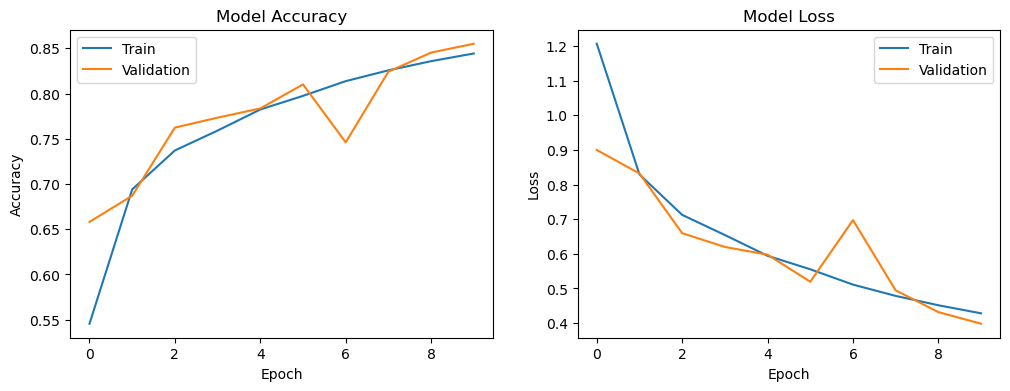

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt

# Load the npz file
npz_file_path = r"C:\Users\An\pathMNIST.npz"
data = np.load(npz_file_path, allow_pickle=True)

# Extract arrays from the npz file
train_images = data['train_images'] / 255.0
val_images = data['val_images'] / 255.0
test_images = data['test_images'] / 255.0
train_labels = data['train_labels']
val_labels = data['val_labels']
test_labels = data['test_labels']

# One-hot encode labels
train_labels_one_hot = to_categorical(train_labels, num_classes=9)
val_labels_one_hot = to_categorical(val_labels, num_classes=9)
test_labels_one_hot = to_categorical(test_labels, num_classes=9)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model and save the history
history = model.fit(train_images, train_labels_one_hot, epochs=10, validation_data=(val_images, val_labels_one_hot))

# Plotting the learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()